In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# 构建方程
from sklearn.linear_model import LinearRegression,Ridge,Lasso

# 构建方程？？？
from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn import datasets

from sklearn.model_selection import train_test_split

d:\python3.6.8\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
faces = datasets.fetch_olivetti_faces()
X = faces.data
images = faces.images
y = faces.target
display(X.shape,y.shape,images.shape)

(400, 4096)

(400,)

(400, 64, 64)

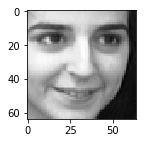

In [9]:
plt.figure(figsize=(2,2))
index = np.random.randint(0,400,size = 1)[0]
img = images[index]
plt.imshow(img,cmap = plt.cm.gray)

### 将X（人脸数据）分成上半张人脸和下半张人脸

In [10]:
# 上半张人脸
X_up = X[:,:2048]

# 下半张人脸
X_down = X[:,2048:]

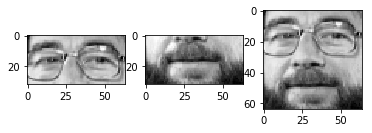

In [15]:
index = np.random.randint(0,400,size = 1)[0]

axes = plt.subplot(1,3,1)
up_face = X_up[index].reshape(32,64)
axes.imshow(up_face,cmap = 'gray')

axes = plt.subplot(1,3,2)
down_face = X_down[index].reshape(32,64)
axes.imshow(down_face,cmap = 'gray')

axes = plt.subplot(1,3,3)
face = X[index].reshape(64,64)
axes.imshow(face,cmap = plt.cm.gray)

In [16]:
X = X_up.copy()
y = X_down.copy()
display(X.shape,y.shape)

(400, 2048)

(400, 2048)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 30)
X_test.shape

(30, 2048)

In [17]:
estimators = {}
estimators['linear'] = LinearRegression()
estimators['ridge'] = Ridge(alpha=0.1)
estimators['lasso'] = Lasso(alpha=1)
estimators['knn'] = KNeighborsRegressor(n_neighbors=5)
estimators['tree'] = DecisionTreeRegressor()

In [19]:
result = {}
for key,model in estimators.items():
    model.fit(X_train,y_train)
    y_ = model.predict(X_test)#预测的是下半张人脸
    result[key] = y_

### 结果可视化

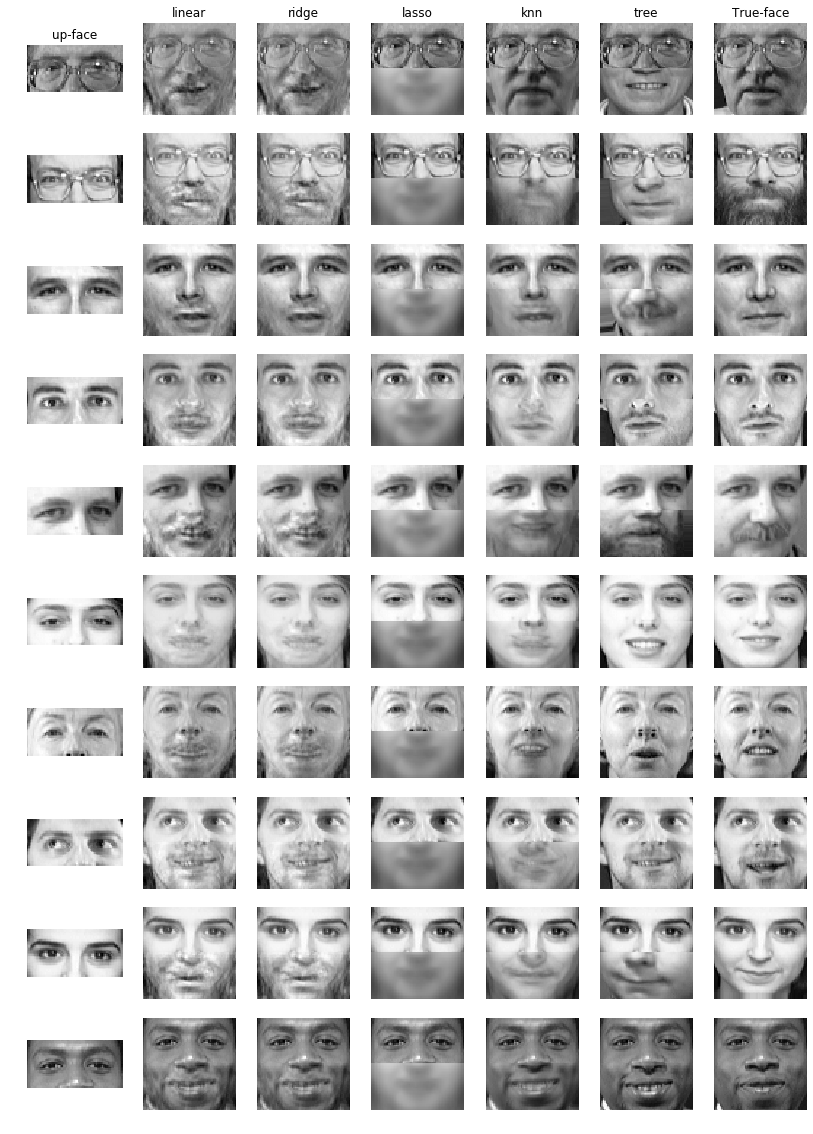

In [29]:
plt.figure(figsize=(7*2,10*2))
for i in range(0,10):
#     第一列，上半张人脸
    axes = plt.subplot(10,7,i*7 + 1)
    up_face = X_test[i].reshape(32,64)
    axes.imshow(up_face,cmap = plt.cm.gray)
    axes.axis('off')
    if i == 0:
        axes.set_title('up-face')
    
#     第七列，整张人脸
    axes = plt.subplot(10,7,i*7 + 7)
    down_face = y_test[i].reshape(32,64)
    true_face = np.concatenate([up_face,down_face])
    axes.imshow(true_face,cmap = plt.cm.gray)
    axes.axis('off')
    if i == 0:
        axes.set_title('True-face')
    
#     绘制第二列到第六列,算法预测的数据result，字典，key算法，value 预测人脸
    for j ,key in enumerate(result):#j 0,1,2,3,4
        axes = plt.subplot(10,7,i*7 + 2 + j)
        y_ = result[key]
        predict_down_face = y_[i].reshape(32,64)
        predict_face = np.concatenate([up_face,predict_down_face])
        axes.imshow(predict_face,cmap = 'gray')
        axes.axis('off')
        if i == 0:
            axes.set_title(key)